In [1]:
!pip install gym-super-mario-bros nes_py

  Using cached gym_super_mario_bros-7.4.0-py3-none-any.whl (199 kB)
  Using cached nes_py-8.2.1.tar.gz (77 kB)
  Created wheel for nes-py: filename=nes_py-8.2.1-cp38-cp38-win_amd64.whl size=48457 sha256=8307519ef3a2891cd8ee2e3c2273bee229fbd9ff563de31ae45f772015f53289
  Stored in directory: c:\users\phatq\appdata\local\pip\cache\wheels\17\e5\5c\8dfae61b44dbf56c458483aa09accef55a650e0527f6cbd872
Successfully built nes-py


You should consider upgrading via the 'd:\mario_ppo\env\scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
# Import the game
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [3]:
env.action_space

Discrete(7)

In [4]:
env.observation_space.shape

(240, 256, 3)

In [63]:
# Create a flag - restart or not
done = True
# Loop through each frame in the game
for step in range(100000): 
    # Start the game to begin with 
    if done: 
        # Start the game
        env.reset()
    # Do random actions
    state, reward, done, info = env.step(env.action_space.sample())
    # Show the game on the screen
    env.render()
# Close the game
env.close()

KeyboardInterrupt: 

In [64]:
# Close the game
env.close()

In [5]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [6]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [7]:
state = env.reset()

In [8]:
state, reward, done, info = env.step([5])

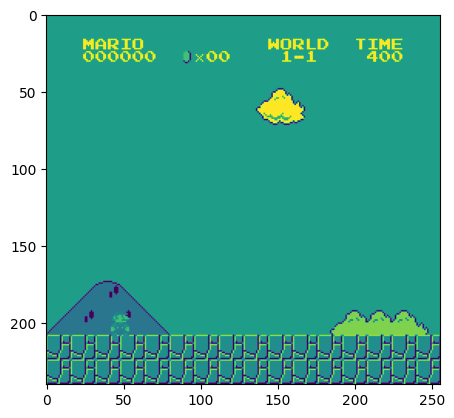

In [9]:
#use matplotlib to show game frame
plt.imshow(state[0][:,:,3])

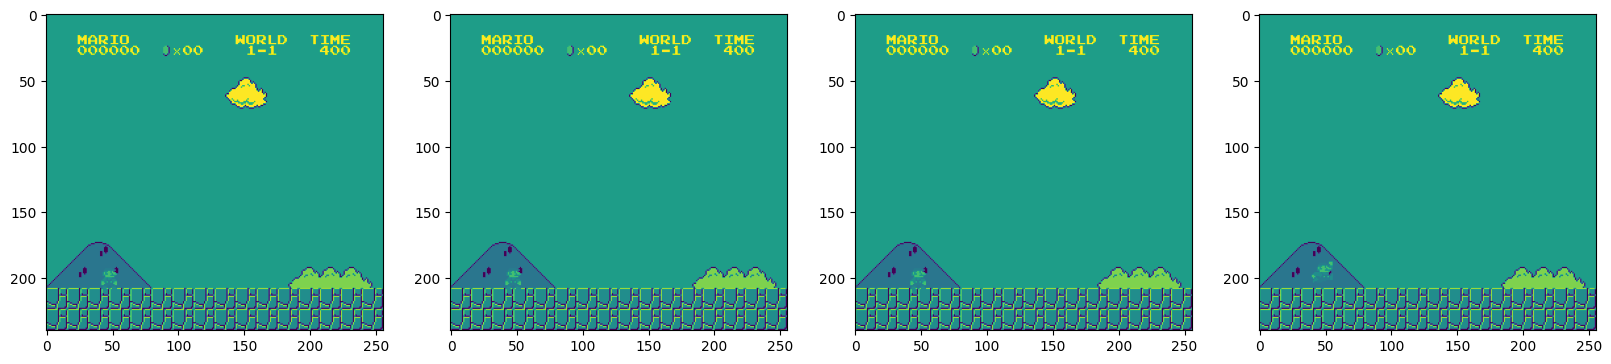

In [16]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

In [9]:
#3. Train the RL model
# Import os for file path management
import os 
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [10]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [11]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [12]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [13]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512) 

Using cpu device
Wrapping the env in a VecTransposeImage.


In [14]:
print("------------------------------------------------START LEARNING------------------------------------------------")
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=100000, callback=callback)
print("-------------------------------------------------DONE LEARNING------------------------------------------------")

------------------------------------------------START LEARNING------------------------------------------------
Logging to ./logs/PPO_6
----------------------------
| time/              |     |
|    fps             | 58  |
|    iterations      | 1   |
|    time_elapsed    | 8   |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 2             |
|    time_elapsed         | 82            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 2.7374015e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | -0.00397      |
|    learning_rate        | 1e-06         |
|    loss                 | 156           |
|    n_updates            | 10            |
| 

KeyboardInterrupt: 

In [8]:
# Import the game
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

#3. Train the RL model
# Import os for file path management
import os 
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [9]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [10]:
state = env.reset()
state, reward, done, info = env.step([5])

In [29]:
#4. Test it out
# Load model
model = PPO.load('./train/best_model_9000000')

In [30]:
state = env.reset()

In [31]:
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

KeyboardInterrupt: 

In [18]:
env.close()